In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # דוגמא לאלגוריתם רגרסיה נוסף

In [20]:
df = pd.read_csv("/Users/Tal/Desktop/Project/WorkDB-28.02.25.csv")

In [21]:
print(df.head())

  Origin Destination  TTT  LOS Departure Time Departure Date Arrival Time  \
0  Paris        Rome    1    1          15:45       1/3/2025        17:50   
1  Paris        Rome    1    1           7:40       1/3/2025         9:45   
2  Paris        Rome    1    1          15:45       1/3/2025        17:50   
3  Paris        Rome    1    1           6:55       1/3/2025         9:00   
4  Paris        Rome    1    1           6:55       1/3/2025         9:00   

  Return Departure Time Return Date Return Arrival Time  ...  \
0                 10:05    2/3/2025               12:20  ...   
1                 19:55    2/3/2025               11:40  ...   
2                  6:00    2/3/2025                8:15  ...   
3                 10:05    2/3/2025               12:20  ...   
4                  6:00    2/3/2025                8:15  ...   

  Return Flight Connections Return Connection Duration(min)  \
0                         0                               0   
1                         

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Origin                             179504 non-null  object 
 1   Destination                        179504 non-null  object 
 2   TTT                                179504 non-null  int64  
 3   LOS                                179504 non-null  int64  
 4   Departure Time                     179504 non-null  object 
 5   Departure Date                     179504 non-null  object 
 6   Arrival Time                       179504 non-null  object 
 7   Return Departure Time              179504 non-null  object 
 8   Return Date                        179504 non-null  object 
 9   Return Arrival Time                179504 non-null  object 
 10  Onward Departure Airport           179504 non-null  object 
 11  Onward Arrival Airport             1795

In [23]:
print(df.describe())

                 TTT            LOS  Onward Flight Connections  \
count  179504.000000  179504.000000              179504.000000   
mean       15.223204       3.003148                   0.010178   
std         8.713007       1.414732                   0.100483   
min         1.000000       1.000000                   0.000000   
25%         8.000000       2.000000                   0.000000   
50%        15.000000       3.000000                   0.000000   
75%        23.000000       4.000000                   0.000000   
max        30.000000       5.000000                   2.000000   

       Onward Connection Duration(min)  Return Flight Connections  \
count                    179504.000000              179504.000000   
mean                          1.318160                   0.010289   
std                          21.731453                   0.100914   
min                           0.000000                   0.000000   
25%                           0.000000                   0.0

In [24]:
print(df.isnull().sum())

Origin                                    0
Destination                               0
TTT                                       0
LOS                                       0
Departure Time                            0
Departure Date                            0
Arrival Time                              0
Return Departure Time                     0
Return Date                               0
Return Arrival Time                       0
Onward Departure Airport                  0
Onward Arrival Airport                    0
Return Departure Airport                  0
Return Arrival Airport                    0
Onward Airlines                           0
Return Airlines                           0
Onward Flight Connections                 0
Onward Connection Duration(min)           0
Onward Flight Connection Airport     177679
Return Flight Connections                 0
Return Connection Duration(min)           0
Return Flight Connection Airport     177657
Carry-ons                       

In [26]:
print(df.nunique())

Origin                                  3
Destination                             3
TTT                                    30
LOS                                     5
Departure Time                        195
Departure Date                         30
Arrival Time                          226
Return Departure Time                 202
Return Date                            34
Return Arrival Time                   232
Onward Departure Airport               11
Onward Arrival Airport                 11
Return Departure Airport               12
Return Arrival Airport                 12
Onward Airlines                        43
Return Airlines                        38
Onward Flight Connections               3
Onward Connection Duration(min)        76
Onward Flight Connection Airport       52
Return Flight Connections               2
Return Connection Duration(min)        71
Return Flight Connection Airport       53
Carry-ons                               2
Checked Bags                      

In [27]:
print(df.duplicated().sum())

17129


In [29]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'], dayfirst=True)
df['Return Date'] = pd.to_datetime(df['Return Date'], dayfirst=True)
df['Snapshot Time'] = pd.to_datetime(df['Snapshot Time'], dayfirst=True)

In [30]:
print(df.info()) # בדיקת סוגי הנתונים לאחר ההמרה

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179504 non-null  object        
 1   Destination                        179504 non-null  object        
 2   TTT                                179504 non-null  int64         
 3   LOS                                179504 non-null  int64         
 4   Departure Time                     179504 non-null  object        
 5   Departure Date                     179504 non-null  datetime64[ns]
 6   Arrival Time                       179504 non-null  object        
 7   Return Departure Time              179504 non-null  object        
 8   Return Date                        179504 non-null  datetime64[ns]
 9   Return Arrival Time                179504 non-null  object        
 10  Onward Departure Air

In [31]:
 print(df.isnull().sum())

Origin                                    0
Destination                               0
TTT                                       0
LOS                                       0
Departure Time                            0
Departure Date                            0
Arrival Time                              0
Return Departure Time                     0
Return Date                               0
Return Arrival Time                       0
Onward Departure Airport                  0
Onward Arrival Airport                    0
Return Departure Airport                  0
Return Arrival Airport                    0
Onward Airlines                           0
Return Airlines                           0
Onward Flight Connections                 0
Onward Connection Duration(min)           0
Onward Flight Connection Airport     177679
Return Flight Connections                 0
Return Connection Duration(min)           0
Return Flight Connection Airport     177657
Carry-ons                       

In [32]:
df['Onward Flight Connection Airport'].fillna('Direct Flight', inplace=True)
df['Return Flight Connection Airport'].fillna('Direct Flight', inplace=True)

/var/folders/q_/wnkd9zks23g4q31ztqpnv5fw0000gp/T/ipykernel_4593/3992325935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Onward Flight Connection Airport'].fillna('Direct Flight', inplace=True)
/var/folders/q_/wnkd9zks23g4q31ztqpnv5fw0000gp/T/ipykernel_4593/3992325935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [33]:
df['Carry-ons'].fillna(df['Carry-ons'].mode()[0], inplace=True)
df['Checked Bags'].fillna(df['Checked Bags'].mode()[0], inplace=True)

/var/folders/q_/wnkd9zks23g4q31ztqpnv5fw0000gp/T/ipykernel_4593/2576710476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Carry-ons'].fillna(df['Carry-ons'].mode()[0], inplace=True)
/var/folders/q_/wnkd9zks23g4q31ztqpnv5fw0000gp/T/ipykernel_4593/2576710476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [34]:
print(df.isnull().sum())

Origin                               0
Destination                          0
TTT                                  0
LOS                                  0
Departure Time                       0
Departure Date                       0
Arrival Time                         0
Return Departure Time                0
Return Date                          0
Return Arrival Time                  0
Onward Departure Airport             0
Onward Arrival Airport               0
Return Departure Airport             0
Return Arrival Airport               0
Onward Airlines                      0
Return Airlines                      0
Onward Flight Connections            0
Onward Connection Duration(min)      0
Onward Flight Connection Airport     0
Return Flight Connections            0
Return Connection Duration(min)      0
Return Flight Connection Airport     0
Carry-ons                            0
Checked Bags                         0
Price(NIS)                           0
Snapshot Time            

In [35]:
print(df.duplicated().sum())

17129


In [36]:
df.drop_duplicates(inplace=True)

In [37]:
print(df.duplicated().sum())

0


In [38]:
print(df.shape)

(162375, 29)


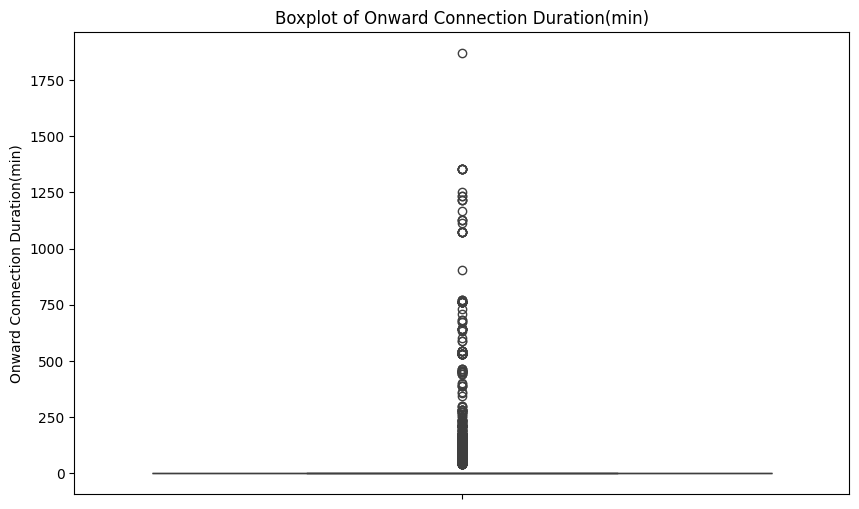

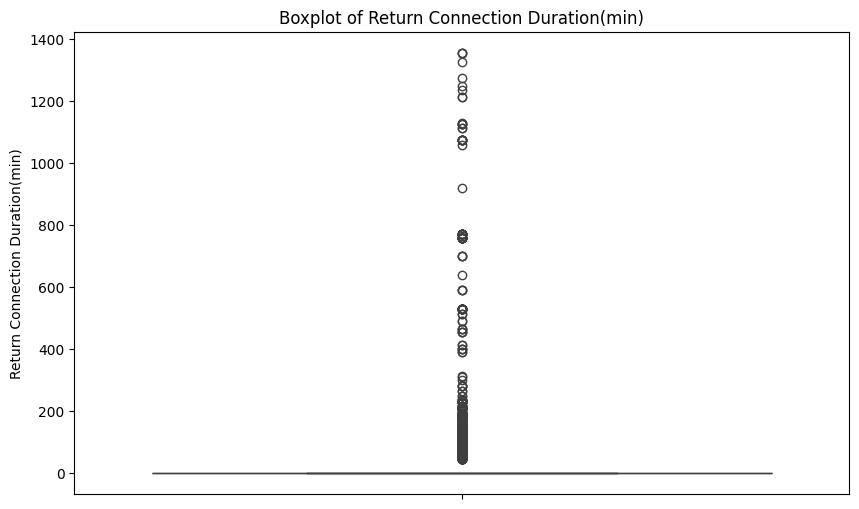

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(df['Onward Connection Duration(min)'])
plt.title('Boxplot of Onward Connection Duration(min)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['Return Connection Duration(min)'])
plt.title('Boxplot of Return Connection Duration(min)')
plt.show()

In [40]:
print(df['Onward Connection Duration(min)'].describe())
print(df['Return Connection Duration(min)'].describe())

count    162375.000000
mean          1.383526
std          22.701410
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1870.000000
Name: Onward Connection Duration(min), dtype: float64
count    162375.000000
mean          1.382941
std          22.090920
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1355.000000
Name: Return Connection Duration(min), dtype: float64


In [41]:
onward_threshold = df['Onward Connection Duration(min)'].quantile(0.999)
return_threshold = df['Return Connection Duration(min)'].quantile(0.999)

df['Onward Connection Duration(min)'] = df['Onward Connection Duration(min)'].apply(lambda x: onward_threshold if x > onward_threshold else x)
df['Return Connection Duration(min)'] = df['Return Connection Duration(min)'].apply(lambda x: return_threshold if x > return_threshold else x)

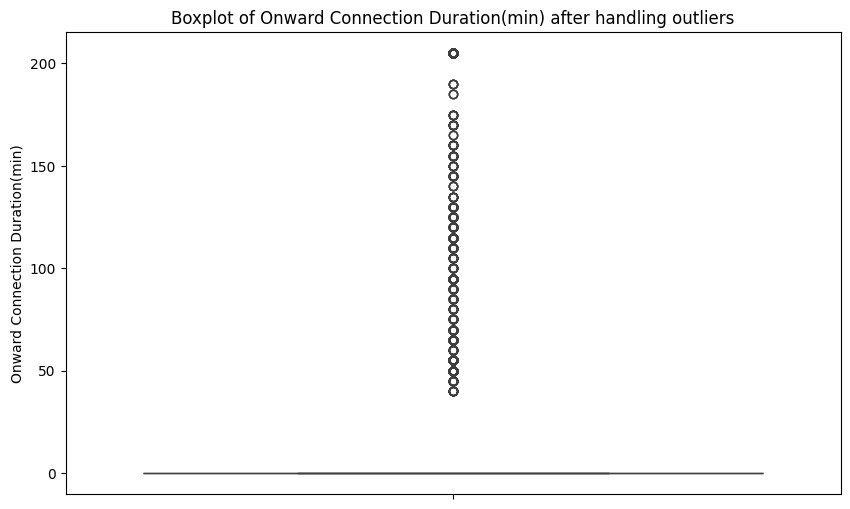

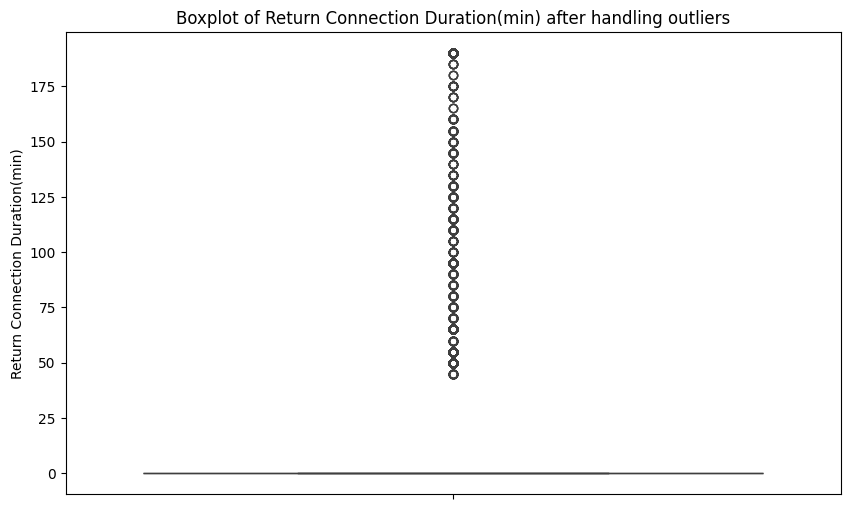

count    162375.000000
mean          1.020724
std          11.128419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         205.000000
Name: Onward Connection Duration(min), dtype: float64
count    162375.000000
mean          1.032117
std          11.095304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         190.000000
Name: Return Connection Duration(min), dtype: float64


In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Onward Connection Duration(min)'])
plt.title('Boxplot of Onward Connection Duration(min) after handling outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['Return Connection Duration(min)'])
plt.title('Boxplot of Return Connection Duration(min) after handling outliers')
plt.show()

print(df['Onward Connection Duration(min)'].describe())
print(df['Return Connection Duration(min)'].describe())

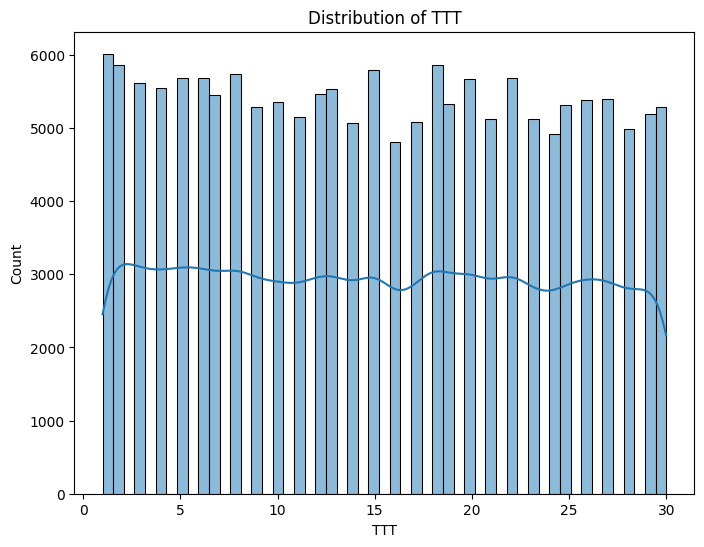

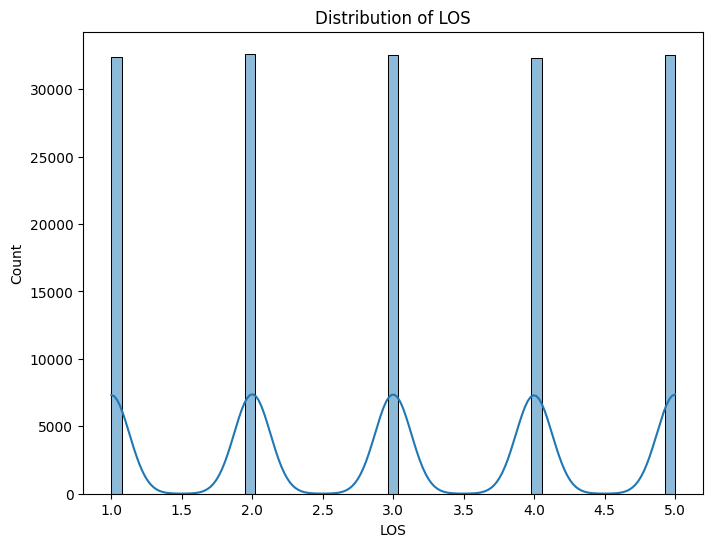

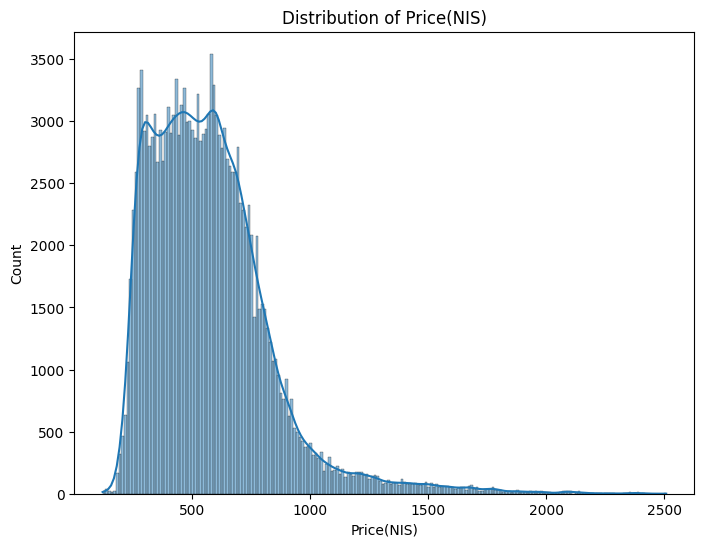

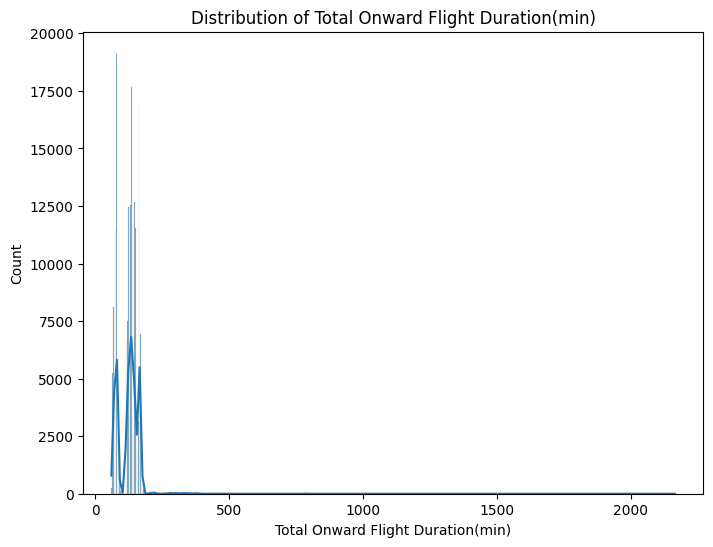

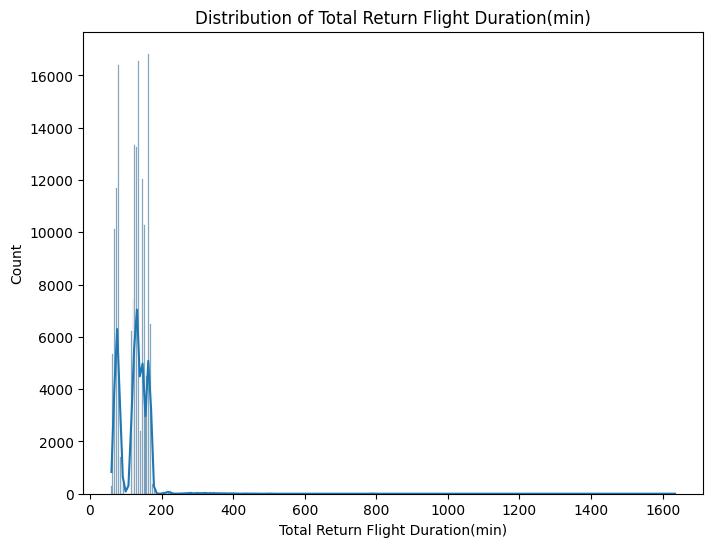

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['TTT', 'LOS', 'Price(NIS)', 'Total Onward Flight Duration(min)', 'Total Return Flight Duration(min)']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

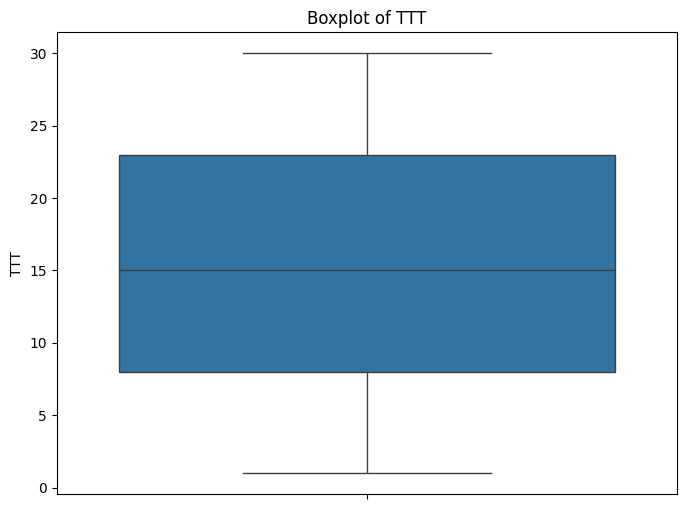

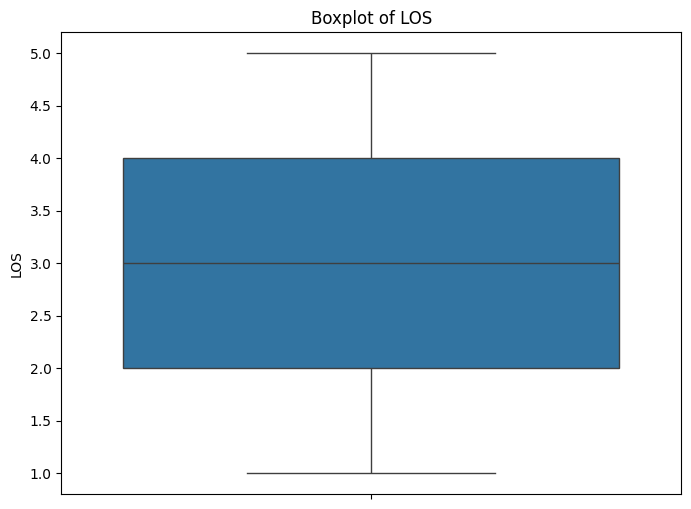

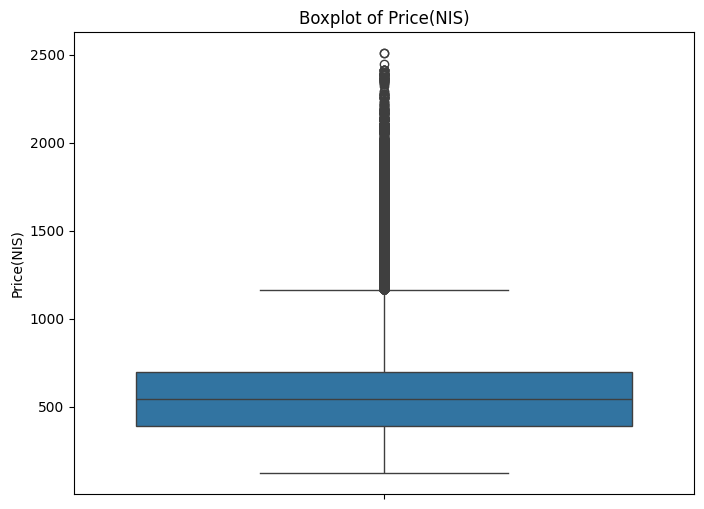

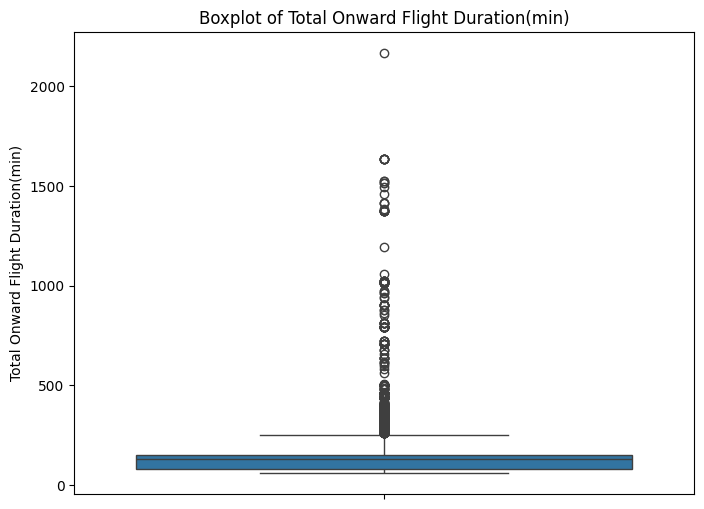

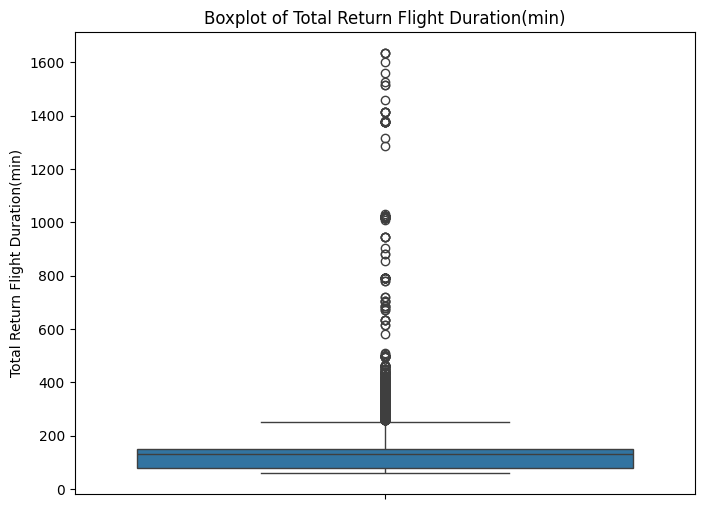

In [44]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

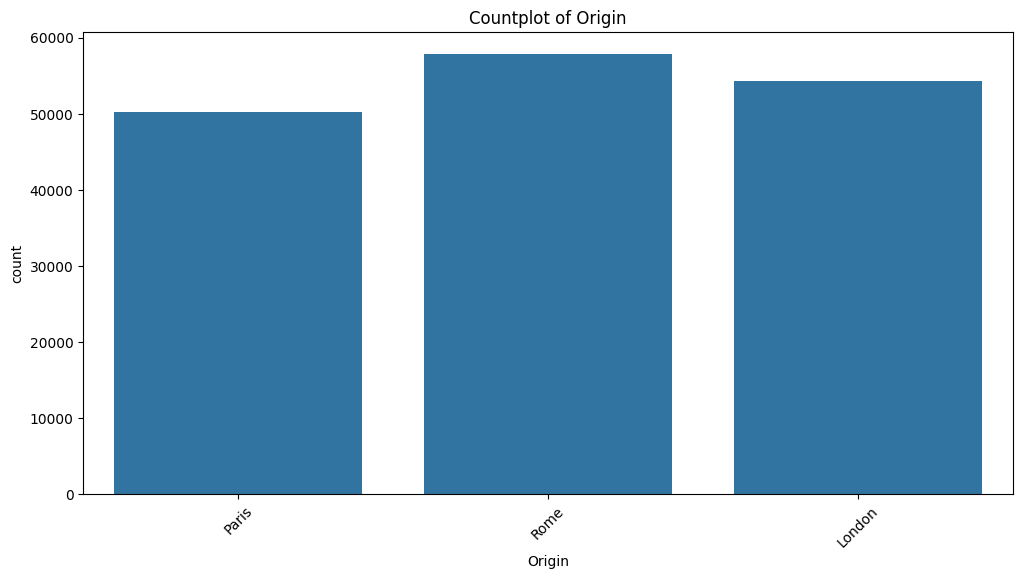

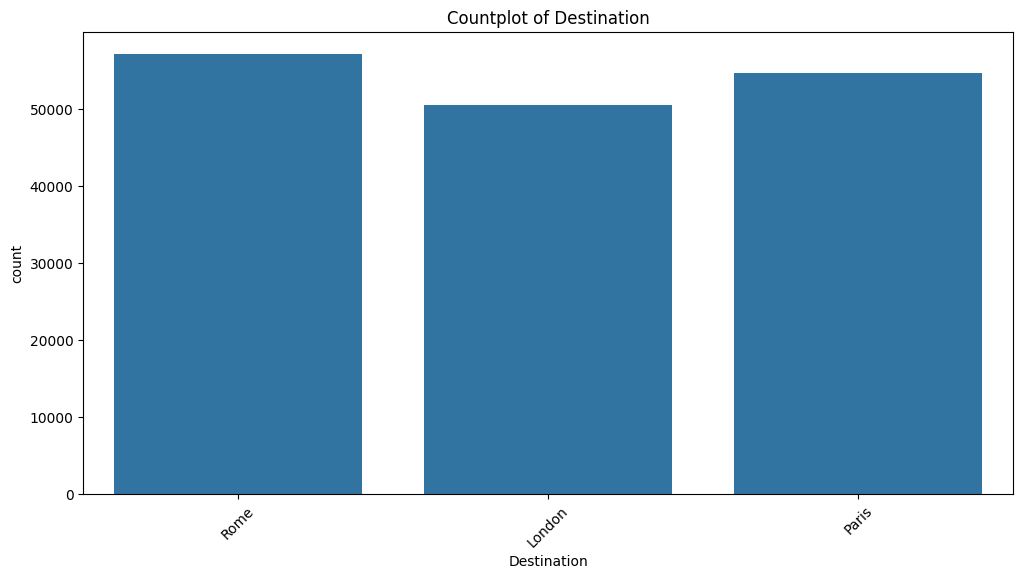

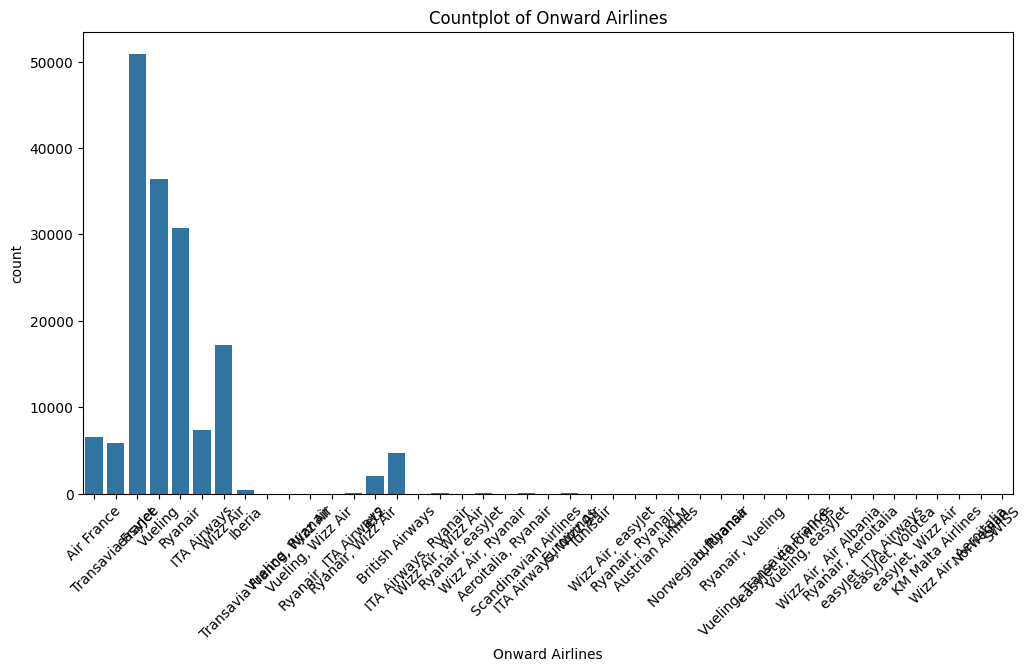

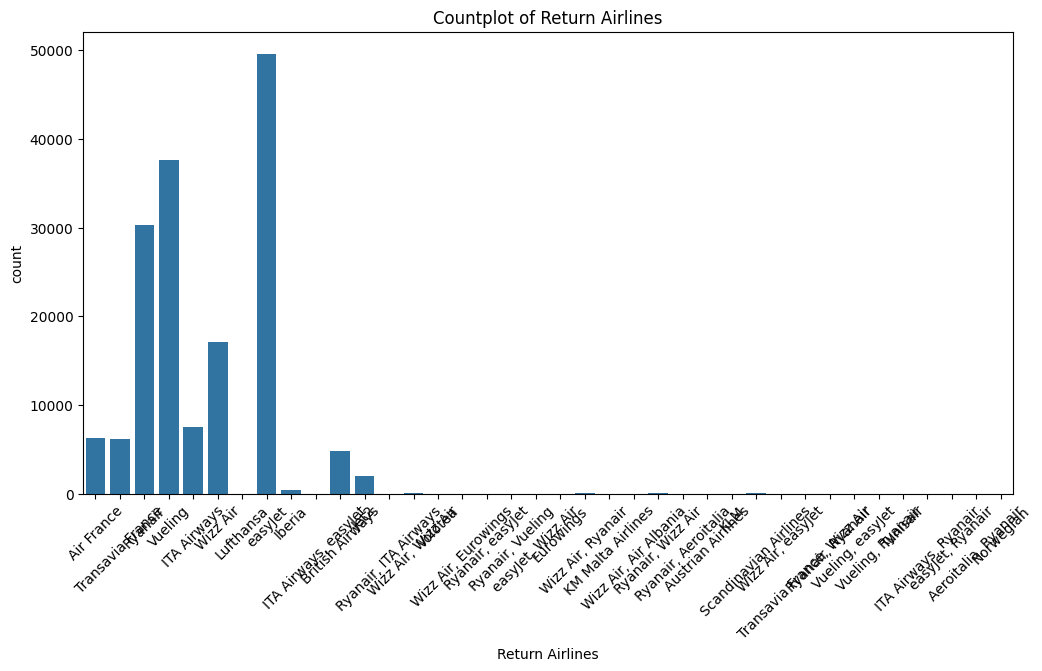

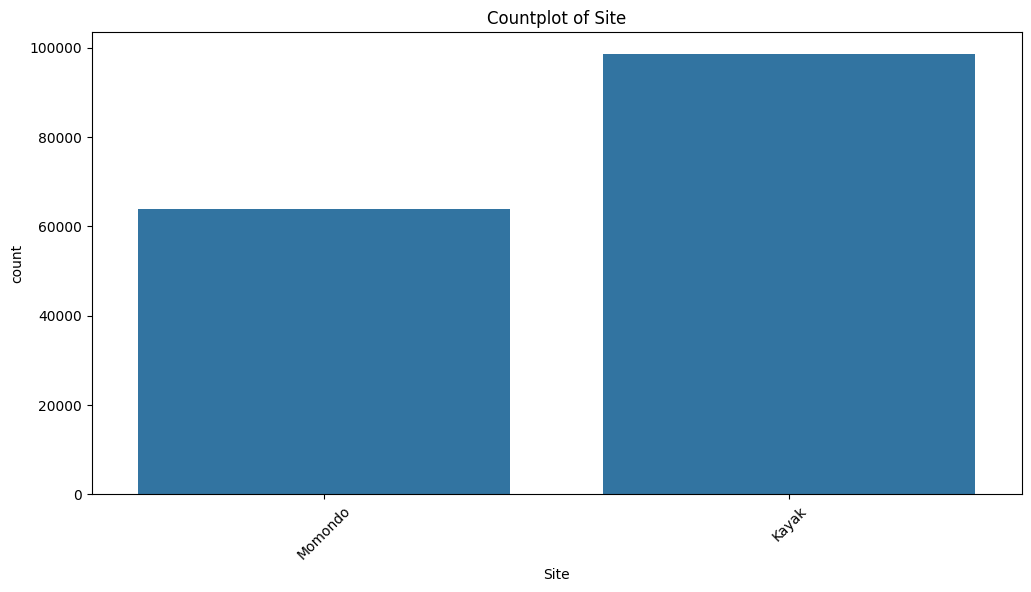

In [45]:
categorical_features = ['Origin', 'Destination', 'Onward Airlines', 'Return Airlines', 'Site']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

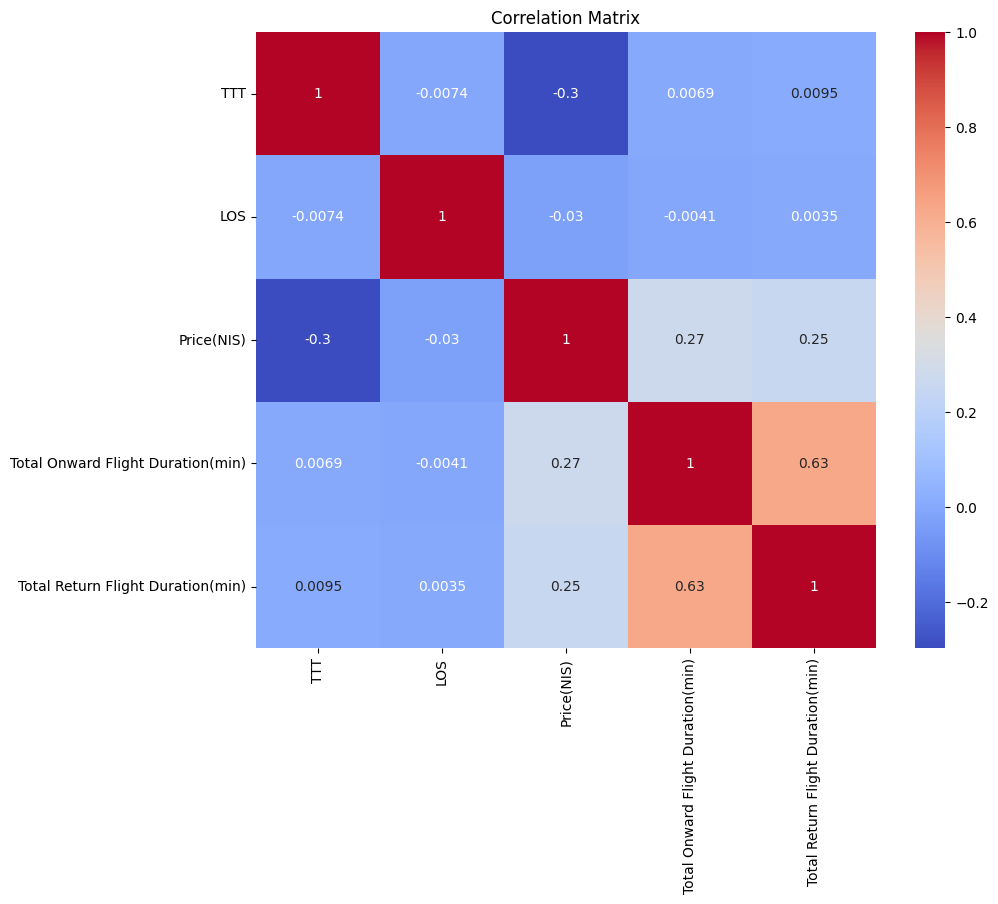

In [46]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

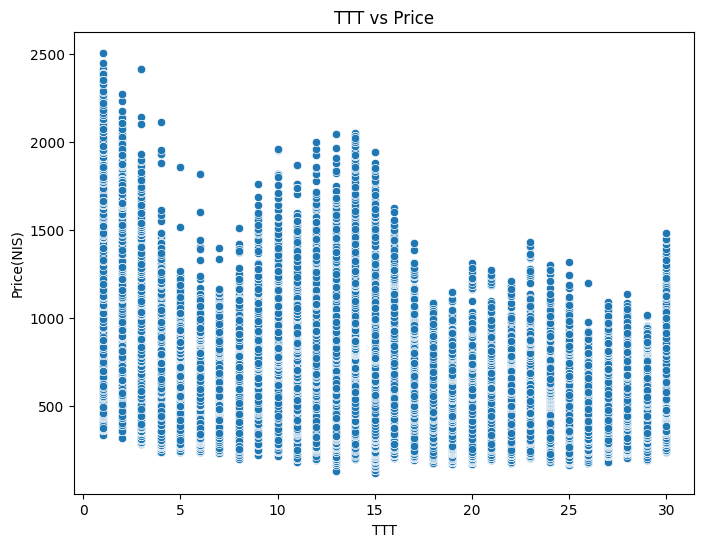

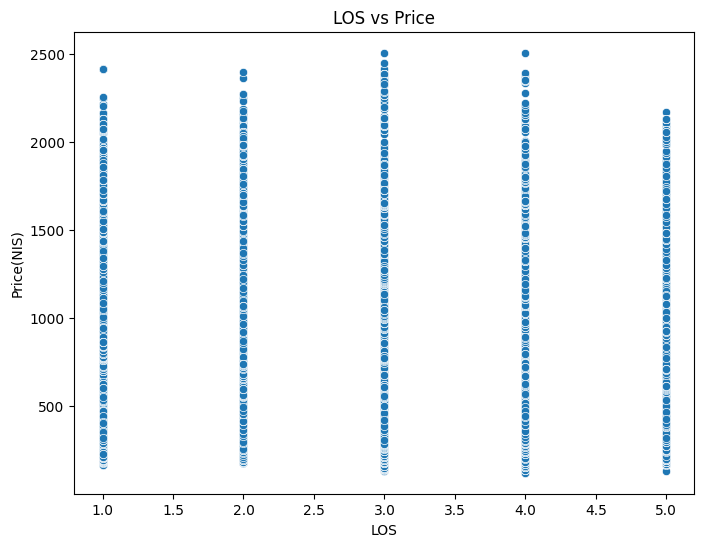

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TTT', y='Price(NIS)', data=df)
plt.title('TTT vs Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='LOS', y='Price(NIS)', data=df)
plt.title('LOS vs Price')
plt.show()

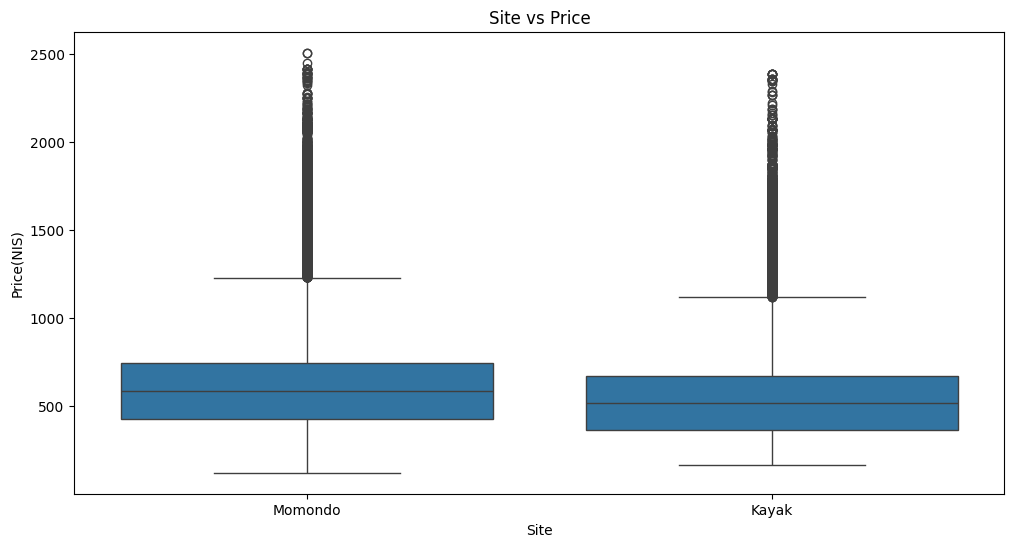

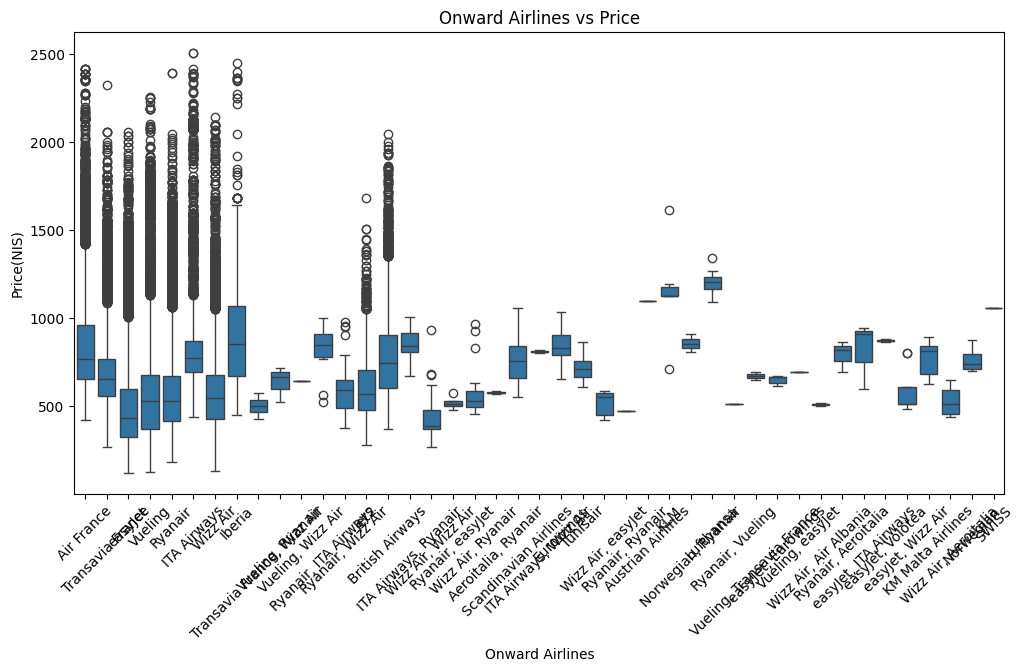

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Site', y='Price(NIS)', data=df)
plt.title('Site vs Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Onward Airlines', y='Price(NIS)', data=df)
plt.xticks(rotation=45)
plt.title('Onward Airlines vs Price')
plt.show()

In [49]:
df['Departure Hour'] = pd.to_datetime(df['Departure Time'], format='%H:%M').dt.hour
df['Departure Minute'] = pd.to_datetime(df['Departure Time'], format='%H:%M').dt.minute
df['Return Hour'] = pd.to_datetime(df['Return Departure Time'], format='%H:%M').dt.hour
df['Return Minute'] = pd.to_datetime(df['Return Departure Time'], format='%H:%M').dt.minute

In [50]:
df['Days Until Departure'] = (df['Departure Date'] - df['Snapshot Time']).dt.days

In [51]:
df = pd.get_dummies(df, columns=['Origin', 'Destination', 'Onward Airlines', 'Return Airlines', 'Site'], drop_first=True)

In [52]:
df['Total Flight Duration'] = df['Total Onward Flight Duration(min)'] + df['Total Return Flight Duration(min)']

In [53]:
df['Price per Day'] = df['Price(NIS)'] / (df['LOS'] + 1)

In [54]:
import datetime

holiday_dates = [datetime.date(2025, 4, 15), datetime.date(2025, 9, 25)] # דוגמא לתאריכי חגים

def calculate_days_to_holiday(date):
    min_days = float('inf')
    for holiday in holiday_dates:
        days = abs((date.date() - holiday).days)
        if days < min_days:
            min_days = days
    return min_days

df['Days to Holiday'] = df['Departure Date'].apply(calculate_days_to_holiday)

In [55]:
print(df.head())
print(df.info())

   TTT  LOS Departure Time Departure Date Arrival Time Return Departure Time  \
0    1    1          15:45     2025-03-01        17:50                 10:05   
1    1    1           7:40     2025-03-01         9:45                 19:55   
2    1    1          15:45     2025-03-01        17:50                  6:00   
3    1    1           6:55     2025-03-01         9:00                 10:05   
4    1    1           6:55     2025-03-01         9:00                  6:00   

  Return Date Return Arrival Time Onward Departure Airport  \
0  2025-03-02               12:20                      CDG   
1  2025-03-02               11:40                      ORY   
2  2025-03-02                8:15                      CDG   
3  2025-03-02               12:20                      CDG   
4  2025-03-02                8:15                      CDG   

  Onward Arrival Airport  ... Return Airlines_Wizz Air, Ryanair  \
0                    FCO  ...                             False   
1           

In [60]:
# הוספת יום בשבוע
df['Departure Day of Week'] = df['Departure Date'].dt.dayofweek
df['Return Day of Week'] = df['Return Date'].dt.dayofweek

# תיקון שמות פיצ'רים
features = ['TTT', 'LOS', 'Departure Day of Week', 'Return Day of Week', 'Departure Hour', 'Return Hour',
            'Total Flight Duration', 'Price per Day', 'Days to Holiday',
            'Origin_Rome', 'Destination_Rome', # תיקון שמות פיצ'רים
            'Onward Airlines_easyJet', 'Onward Airlines_Ryanair', 'Onward Airlines_Wizz Air',
            'Return Airlines_easyJet', 'Return Airlines_Ryanair', 'Return Airlines_Wizz Air',
            'Site_Momondo'] # תיקון שמות פיצ'רים

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (113662, 18)
Test set size: (48713, 18)


In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
y_pred = model.predict(X_test)

In [67]:
rf_y_pred = rf_model.predict(X_test)

In [68]:
print("Linear Regression Predictions:", y_pred)
print("Random Forest Regression Predictions:", rf_y_pred)

Linear Regression Predictions: [391.9392584  526.46197183 666.00565519 ... 322.79835283 345.2886984
 705.20982995]
Random Forest Regression Predictions: [348.   507.   777.09 ... 353.   361.   781.  ]


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

# Random Forest Regression
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Metrics:")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R2: {rf_r2:.2f}")

Linear Regression Metrics:
MAE: 78.18
MSE: 11371.30
RMSE: 106.64
R2: 0.83

Random Forest Regression Metrics:
MAE: 0.05
MSE: 0.71
RMSE: 0.84
R2: 1.00


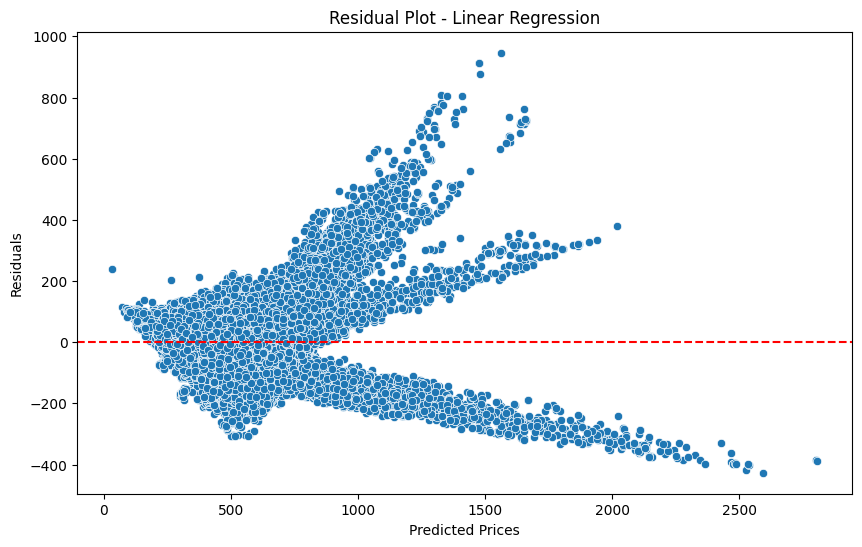

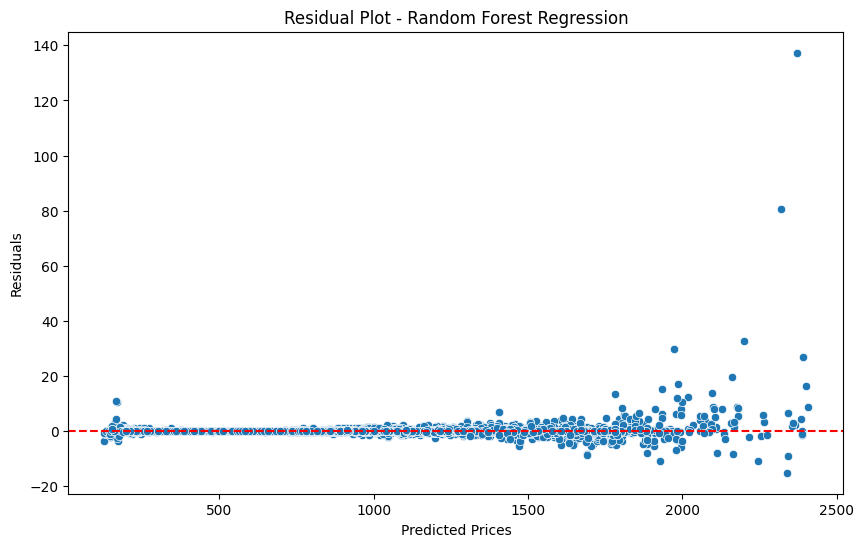

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Linear Regression')
plt.show()

# Random Forest Regression
rf_residuals = y_test - rf_y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_y_pred, y=rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regression')
plt.show()

In [71]:
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance_df)


Random Forest Feature Importance:
                     Feature    Importance
7              Price per Day  7.003399e-01
1                        LOS  2.996269e-01
8            Days to Holiday  8.357427e-06
4             Departure Hour  7.258511e-06
2      Departure Day of Week  3.560238e-06
3         Return Day of Week  3.050138e-06
6      Total Flight Duration  2.783078e-06
17              Site_Momondo  2.561020e-06
0                        TTT  2.143097e-06
5                Return Hour  1.432583e-06
14   Return Airlines_easyJet  6.219562e-07
16  Return Airlines_Wizz Air  4.893427e-07
9                Origin_Rome  3.391551e-07
10          Destination_Rome  2.988997e-07
13  Onward Airlines_Wizz Air  1.233685e-07
12   Onward Airlines_Ryanair  7.442334e-08
11   Onward Airlines_easyJet  5.544098e-08
15   Return Airlines_Ryanair  5.003631e-08


In [72]:
features = ['TTT', 'LOS', 'Departure Day of Week', 'Return Day of Week', 'Departure Hour', 'Return Hour',
            'Total Flight Duration', 'Days to Holiday',
            'Origin_Rome', 'Destination_Rome',
            'Onward Airlines_easyJet', 'Onward Airlines_Ryanair', 'Onward Airlines_Wizz Air',
            'Return Airlines_easyJet', 'Return Airlines_Ryanair', 'Return Airlines_Wizz Air',
            'Site_Momondo']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

In [74]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
rf_y_pred = rf_model.predict(X_test)

In [76]:
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Metrics (after removing Price per Day):")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R2: {rf_r2:.2f}")


Random Forest Regression Metrics (after removing Price per Day):
MAE: 47.02
MSE: 5610.79
RMSE: 74.91
R2: 0.92


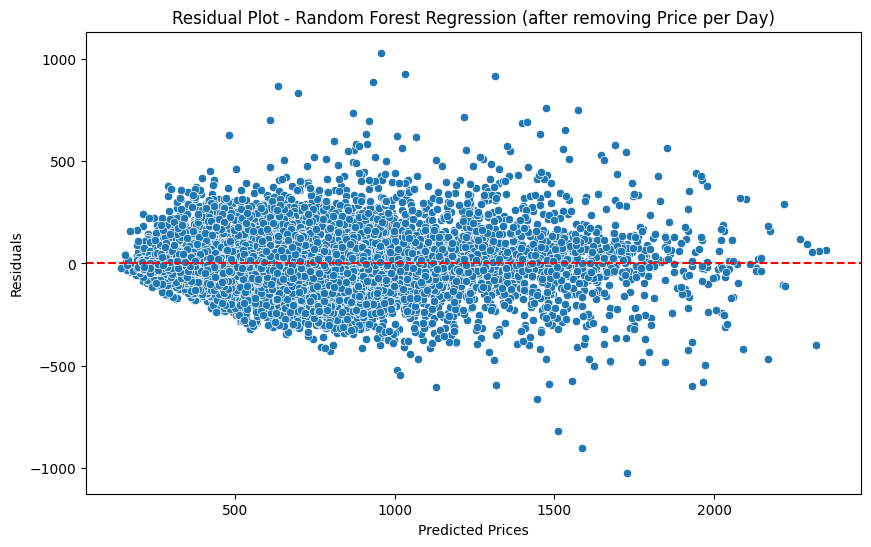

In [77]:
rf_residuals = y_test - rf_y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_y_pred, y=rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regression (after removing Price per Day)')
plt.show()

In [78]:
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance (after removing Price per Day):")
print(feature_importance_df)


Random Forest Feature Importance (after removing Price per Day):
                     Feature  Importance
6      Total Flight Duration    0.372090
0                        TTT    0.130846
7            Days to Holiday    0.111005
3         Return Day of Week    0.064799
4             Departure Hour    0.054522
5                Return Hour    0.052171
2      Departure Day of Week    0.041384
9           Destination_Rome    0.032707
1                        LOS    0.032199
8                Origin_Rome    0.031392
16              Site_Momondo    0.019034
11   Onward Airlines_Ryanair    0.012378
14   Return Airlines_Ryanair    0.011204
12  Onward Airlines_Wizz Air    0.009361
10   Onward Airlines_easyJet    0.009049
15  Return Airlines_Wizz Air    0.008317
13   Return Airlines_easyJet    0.007540


In [79]:
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Metrics (after removing Price per Day):")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R2: {rf_r2:.2f}")


Random Forest Regression Metrics (after removing Price per Day):
MAE: 47.02
MSE: 5610.79
RMSE: 74.91
R2: 0.92


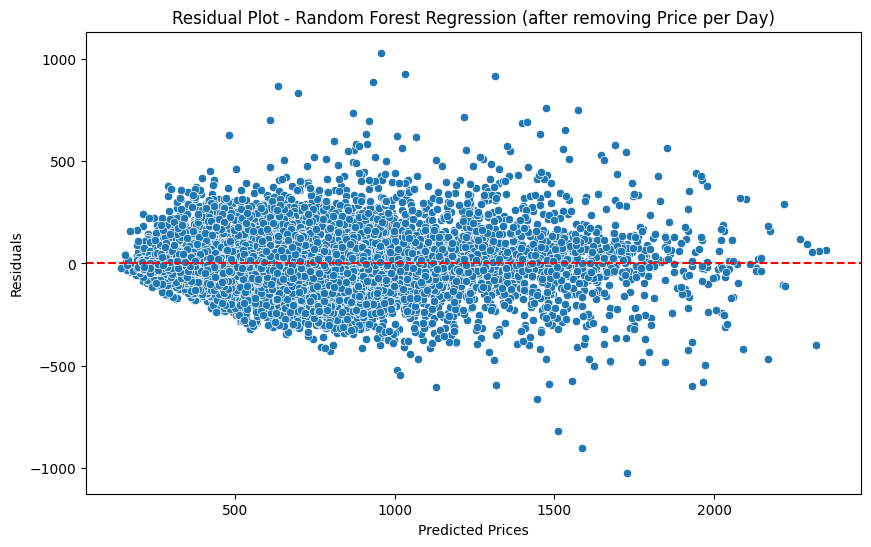

In [80]:
rf_residuals = y_test - rf_y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_y_pred, y=rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regression (after removing Price per Day)')
plt.show()

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  12.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  11.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  12.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  11.9s
[CV] END max_dep

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  46.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  20.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  20.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  21.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  45.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  11.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  11.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  11.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  46.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_esti

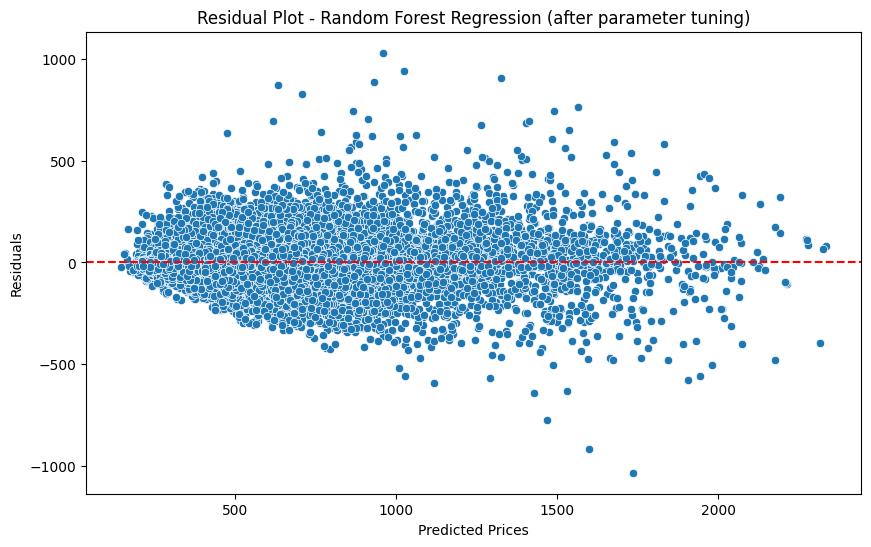

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2) # הסרת הזחה
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

best_rf_y_pred = best_rf_model.predict(X_test)

best_rf_mae = mean_absolute_error(y_test, best_rf_y_pred)
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print("\nRandom Forest Regression Metrics (after parameter tuning):")
print(f"MAE: {best_rf_mae:.2f}")
print(f"MSE: {best_rf_mse:.2f}")
print(f"RMSE: {best_rf_rmse:.2f}")
print(f"R2: {best_rf_r2:.2f}")

best_rf_residuals = y_test - best_rf_y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_rf_y_pred, y=best_rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regression (after parameter tuning)')
plt.show()

In [84]:
best_params = grid_search.best_params_ # קבלת הפרמטרים הטובים ביותר שgrid search מצא

RandomForestRegressor(n_estimators=200, random_state=42)

In [85]:
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [86]:
best_rf_y_pred = best_rf_model.predict(X_test)

In [87]:
best_rf_mae = mean_absolute_error(y_test, best_rf_y_pred)
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print("\nRandom Forest Regression Metrics (after parameter tuning):")
print(f"MAE: {best_rf_mae:.2f}")
print(f"MSE: {best_rf_mse:.2f}")
print(f"RMSE: {best_rf_rmse:.2f}")
print(f"R2: {best_rf_r2:.2f}")


Random Forest Regression Metrics (after parameter tuning):
MAE: 46.86
MSE: 5578.41
RMSE: 74.69
R2: 0.92


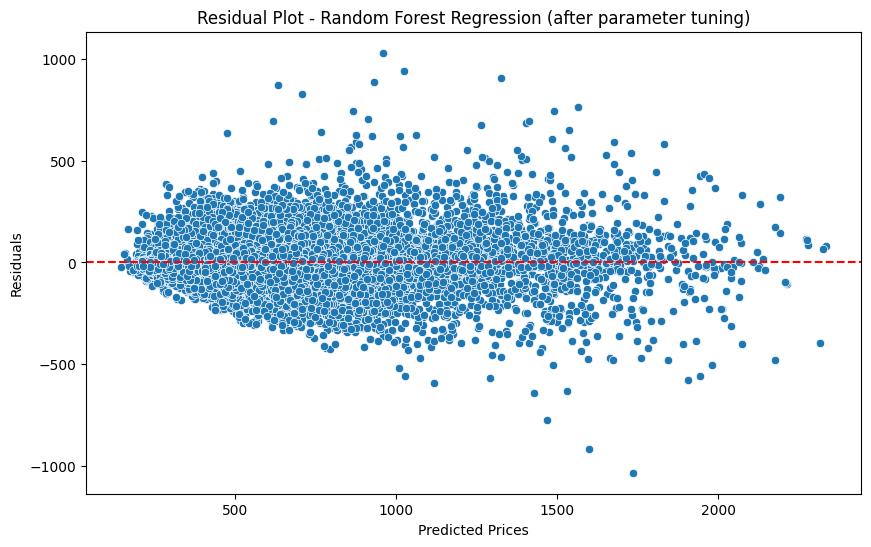

In [88]:
best_rf_residuals = y_test - best_rf_y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_rf_y_pred, y=best_rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regression (after parameter tuning)')
plt.show()

In [89]:
numerical_features = ['TTT', 'LOS', 'Total Flight Duration', 'Days to Holiday']

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [91]:
rf_model_normalized = RandomForestRegressor(random_state=42, **best_params)
rf_model_normalized.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [92]:
rf_y_pred_normalized = rf_model_normalized.predict(X_test)

In [93]:
rf_mae_normalized = mean_absolute_error(y_test, rf_y_pred_normalized)
rf_mse_normalized = mean_squared_error(y_test, rf_y_pred_normalized)
rf_rmse_normalized = np.sqrt(rf_mse_normalized)
rf_r2_normalized = r2_score(y_test, rf_y_pred_normalized)

print("\nRandom Forest Regression Metrics (after normalization):")
print(f"MAE: {rf_mae_normalized:.2f}")
print(f"MSE: {rf_mse_normalized:.2f}")
print(f"RMSE: {rf_rmse_normalized:.2f}")
print(f"R2: {rf_r2_normalized:.2f}")


Random Forest Regression Metrics (after normalization):
MAE: 46.86
MSE: 5578.11
RMSE: 74.69
R2: 0.92


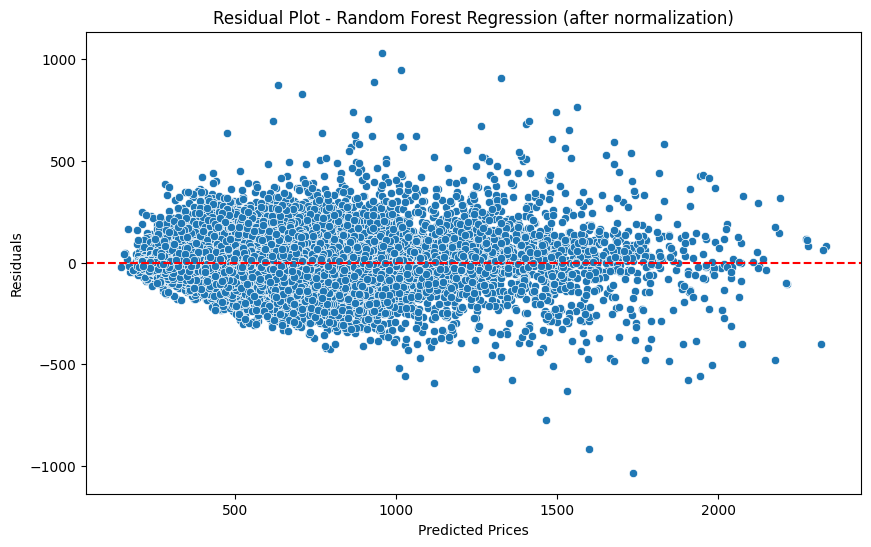

In [94]:
rf_residuals_normalized = y_test - rf_y_pred_normalized
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_y_pred_normalized, y=rf_residuals_normalized)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regression (after normalization)')
plt.show()

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# נניח ש-df הוא DataFrame שמכיל את הנתונים שלך
# נניח ש-features הוא רשימה של שמות הפיצ'רים
# נניח ש-target הוא שם עמודת המטרה

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_dimensions = X_train.shape[1]  # מספר העמודות ב-X_train
print(f"X_train has {num_dimensions} dimensions")

print("Features in X_train:")
print(X_train.columns)

X_train has 17 dimensions
Features in X_train:
Index(['TTT', 'LOS', 'Departure Day of Week', 'Return Day of Week',
       'Departure Hour', 'Return Hour', 'Total Flight Duration',
       'Days to Holiday', 'Origin_Rome', 'Destination_Rome',
       'Onward Airlines_easyJet', 'Onward Airlines_Ryanair',
       'Onward Airlines_Wizz Air', 'Return Airlines_easyJet',
       'Return Airlines_Ryanair', 'Return Airlines_Wizz Air', 'Site_Momondo'],
      dtype='object')
